# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Les données vont de 1990 à 2020.

Afin d'éviter que les modifications du jeu de données d'oorigine n'affecte notre étude, nous allons télécharger les données et les enregistrer sur un fichier local. Ne voulant pas que le téléchargement du fihchier local soit effectué à chaque éxecution du code et écrase le fichier précédemment téléchargé, une vérification de l'existence du fichier sera effectuée avant que la décision de télécharger le fichier ne soit prise.

In [2]:
data_file="varicelle.csv"
data_url="http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url,data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202034          7   2507      259    4755       4           1   
1     202033          7   1320      177    2463       2           0   
2     202032          7   2650      689    4611       4           1   
3     202031          7   1303      100    2506       2           0   
4     202030          7   1385       75    2695       2           0   
5     202029          7    841       10    1672       1           0   
6     202028          7    728        0    1515       1           0   
7     202027          7    986      149    1823       1           0   
8     202026          7    694        0    1454       1           0   
9     202025          7    228        0     597       0           0   
10    202024          7    388        0     959       1           0   
11    202023          7    558        1    1115       1           0   
12    202022          7    277        0     633       0           0   
13    202021          7    602       36    1168       1           0   
14    202020          7    824       20    1628       1           0   
15    202019          7    310        0     753       0           0   
16    202018          7    849       98    1600       1           0   
17    202017          7    272        0     658       0           0   
18    202016          7    758       78    1438       1           0   
19    202015          7   1918      675    3161       3           1   
20    202014          7   3879     2227    5531       6           3   
21    202013          7   7326     5236    9416      11           8   
22    202012          7   8123     5790   10456      12           8   
23    202011          7  10198     7568   12828      15          11   
24    202010          7   9011     6691   11331      14          10   
25    202009          7  13631    10544   16718      21          16   
26    202008          7  10424     7708   13140      16          12   
27    202007          7   8959     6574   11344      14          10   
28    202006          7   9264     6925   11603      14          10   
29    202005          7   8505     6314   10696      13          10   
...      ...        ...    ...      ...     ...     ...         ...   
1521  199126          7  17608    11304   23912      31          20   
1522  199125          7  16169    10700   21638      28          18   
1523  199124          7  16171    10071   22271      28          17   
1524  199123          7  11947     7671   16223      21          13   
1525  199122          7  15452     9953   20951      27          17   
1526  199121          7  14903     8975   20831      26          16   
1527  199120          7  19053    12742   25364      34          23   
1528  199119          7  16739    11246   22232      29          19   
1529  199118          7  21385    13882   28888      38          25   
1530  199117          7  13462     8877   18047      24          16   
1531  199116          7  14857    10068   19646      26          18   
1532  199115          7  13975     9781   18169      25          18   
1533  199114          7  12265     7684   16846      22          14   
1534  199113          7   9567     6041   13093      17          11   
1535  199112          7  10864     7331   14397      19          13   
1536  199111          7  15574    11184   19964      27          19   
1537  199110          7  16643    11372   21914      29          20   
1538  199109          7  13741     8780   18702      24          15   
1539  199108          7  13289     8813   17765      23          15   
1540  199107          7  12337     8077   16597      22          15   
1541  199106          7  10877     7013   14741      19          12   
1542  199105          7  10442     6544   14340      18          11   
1543  199104          7   7913     4563   11263      14           8   
1544  199103          7  15387    10484   20290      27          18   
1545  199102          7  16277  

Nous n'observons pas de données mmanquantes sur ce document.

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [10]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il reste deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.


In [11]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Comme précédemment observé, il n'y a pas de données manquantes.


In [12]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

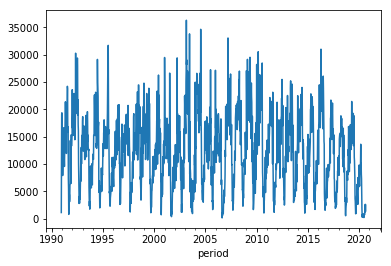

In [13]:
sorted_data['inc'].plot()

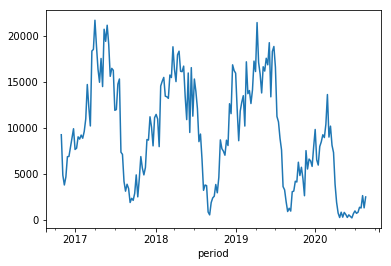

In [14]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en septembre, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en Décembre 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [15]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.


In [17]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

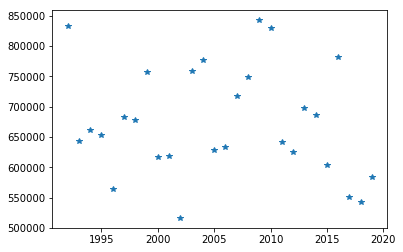

In [18]:
yearly_incidence.plot(style='*')

In [19]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

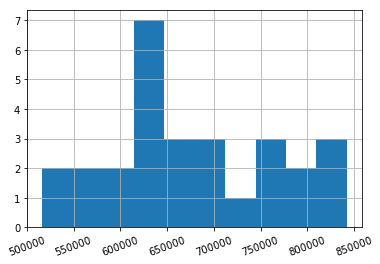

In [20]:
yearly_incidence.hist(xrot=20)